# 機械学習　第７章　実習問題（決定木）

## ※ 準備作業
### １．ドライブのマウント
### ２．ディレクトリの作成
### ３．ディレクトリへの移動
### ４．bank_data.csv ファイルをアップロード

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
mkdir data

In [ ]:
mkdir data

In [ ]:
cd data

/content/data


In [14]:
cd data

/content/data


### ▶実行結果

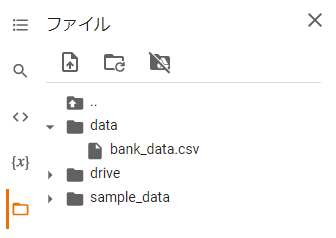

## ※ bank_data.csvの内容

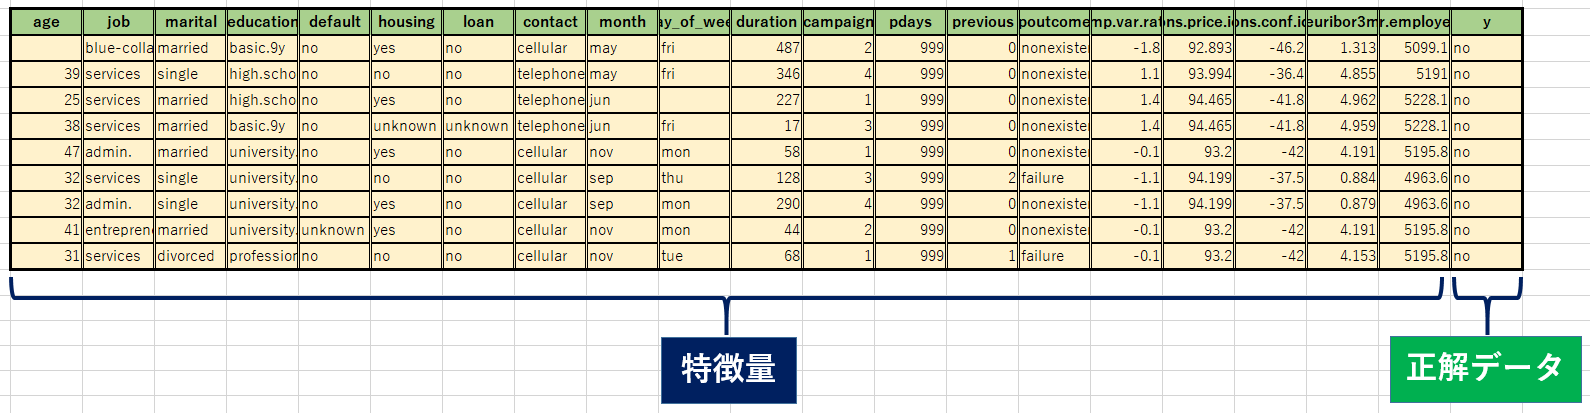

## 問題１
### 下記セルのコメントに従って、必要ライブラリ、モジュールメソッドのインポートをしてください。

In [12]:
# pandasをインポートし、別名 pd とする
# 実装
import pandas as pd
# treeモジュールのインポート
# 実装
from sklearn import tree
# train_test_splitメソッドのインポート
# 実装
from sklearn.model_selection import train_test_split

# グラフ描画を当タブに表示
# 実装
%matplotlib inline

## 問題２
### bank_data.csv を読み込んで、先頭の５行を表示してください。

In [15]:
# bank_data.csv を読み込む
# 実装
df = pd.read_csv('bank.csv')
# 先頭の５行を表示
# 実装
df.head(5) # 先頭2行の確認

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### ▶実行結果

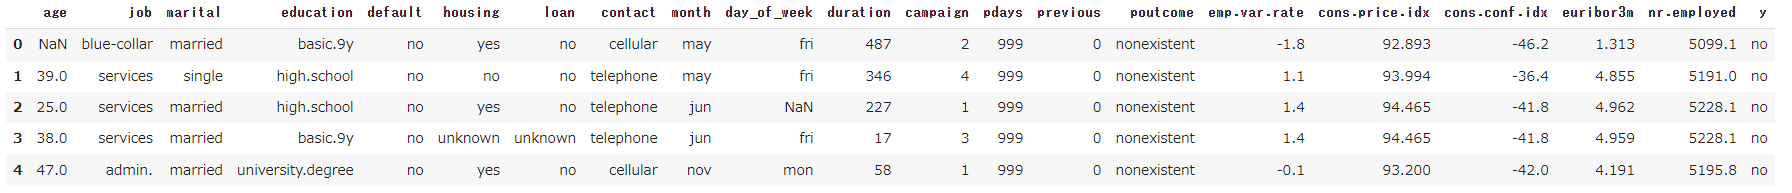

## 問題３
### 問題２で読み込んだCSVファイルの末尾５行を表示してください。

In [16]:
# 実装
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


### ▶実行結果

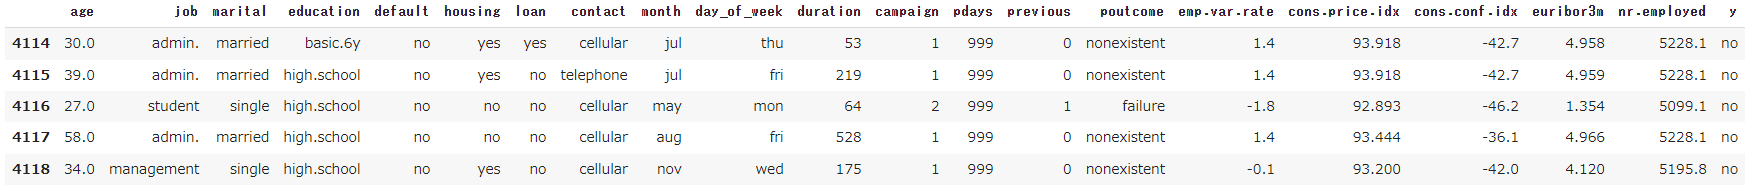

## 問題４
### 正解データにどのようなデータがいくつあるかを表示してください。

In [17]:
# 正解データの類別と個数の表示
# 実装
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

### ▶実行結果

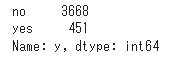

## 問題５
### 欠損値を調べて表示してください。

In [18]:
# 各列の欠損値の個数を表示
# 実装
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### ▶実行結果

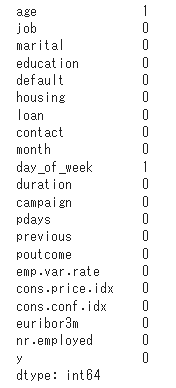

## 問題６
### 読み込んだデータフレームの行数と列数を表示してください。

In [19]:
# 行数と列数を表示
# 実装
df.shape

(4119, 21)

### ▶実行結果

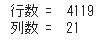

## 問題７

### age 列を列の平均値で、day_of_week 列を列の最頻値で穴埋めして先頭の５行を表示してください。

In [20]:
# age 列を列の平均値で穴埋め
# 実装
df['age'] = df['age'].fillna(df['age'].mean())
# day_of_week 列を列の最頻値で穴埋め
# 実装
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].mode())
# 先頭の５行を表示
# 実装
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### ▶実行結果

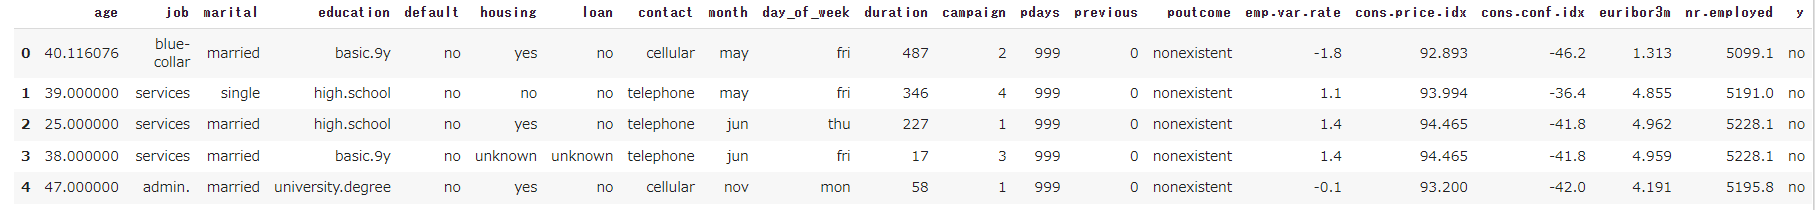

## 問題８
### 特徴量を取り出して、先頭の５行を表示してください。

In [21]:
# 特徴量を取り出す
# 実装
x = df.loc[ : , 'age':'nr.employed']
# 特徴量の先頭の５行を表示
# 実装
x.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


### ▶実行結果

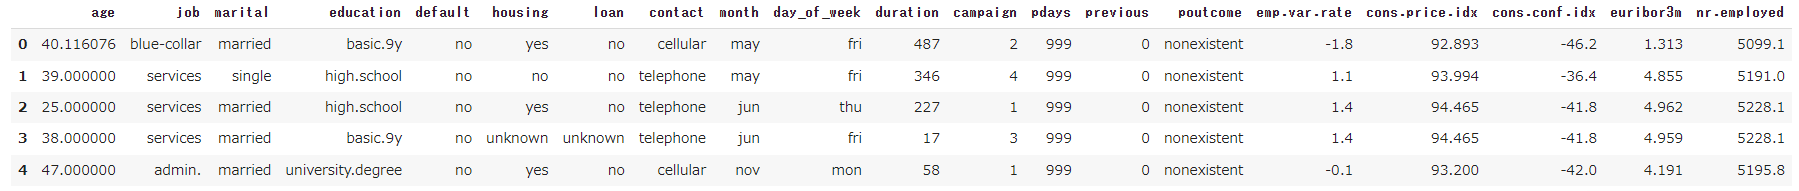

## 問題９
### 正解データを取り出して、先頭の５行を表示してください。

In [22]:
# 特徴を取り出す
# 実装
t = df['y']
# 先頭の５行を表示
# 実装
t.head(5)

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

### ▶実行結果

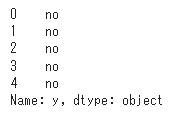

## 問題１０
### 特徴量をダミー変数化して先頭の５行を表示してください。


In [23]:
# 実装
x = pd.get_dummies(x,drop_first=True)
x.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


## 問題１１
### ダミー変数化した特徴量の行数と列数を表示してください。

In [24]:
# ダミー変数化した特徴量の行数と列数を表示
# 行数
# 実装
print('行数 = ',df.shape[0])
# 列数
# 実装
print('列数 = ',df.shape[1])

行数 =  4119
列数 =  21


### ▶実行結果

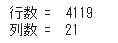

## 問題１２
### テキストP250～P251のlearn関数を実装してください。

In [26]:
# learn関数の仕様
def learn(x, t, depth=3):
  x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
  model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight='balanced')
  model.fit(x_train, y_train)

  score = model.score(X = x_train,y = y_train)
  score2 = model.score(X = x_test,y = y_test)

  return round(score, 3), round(score2, 3), model

## 問題１３
### 問題１２のlearn関数を使用して訓練データの精度とテストデータの精度を表示してください（深さ１５までを表示）

In [27]:
# 実装
for j in range(1, 16):
    train_score, test_score,model = learn(x ,t, j)
    print('深さ{}:訓練データの精度{}::テストデータの精度{}'.format(j, train_score, test_score))

深さ1:訓練データの精度0.876::テストデータの精度0.865
深さ2:訓練データの精度0.862::テストデータの精度0.839
深さ3:訓練データの精度0.822::テストデータの精度0.795
深さ4:訓練データの精度0.9::テストデータの精度0.854
深さ5:訓練データの精度0.903::テストデータの精度0.843
深さ6:訓練データの精度0.91::テストデータの精度0.856
深さ7:訓練データの精度0.91::テストデータの精度0.84
深さ8:訓練データの精度0.91::テストデータの精度0.842
深さ9:訓練データの精度0.92::テストデータの精度0.841
深さ10:訓練データの精度0.935::テストデータの精度0.857
深さ11:訓練データの精度0.944::テストデータの精度0.851
深さ12:訓練データの精度0.949::テストデータの精度0.851
深さ13:訓練データの精度0.963::テストデータの精度0.862
深さ14:訓練データの精度0.981::テストデータの精度0.88
深さ15:訓練データの精度0.984::テストデータの精度0.879


### ▶実行結果

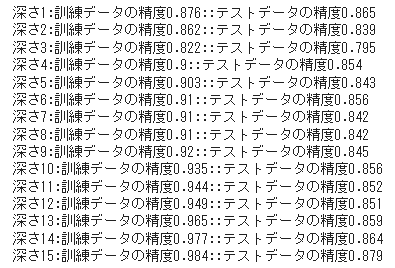

## 問題１３
### 問題１２で作成したモデルを bank.pkl という名前で保存してください。

In [28]:
# pickle をインポート
# 実装
import pickle
# モデルを保存
# 実装
with open('bank.pkl','wb') as f:
    pickle.dump(model, f)

### ▶実行結果

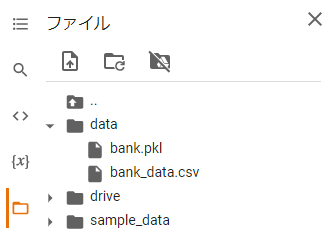